# 目標:
    運用 Keras 模組建構CNN, 了解 CNN 的架構
    
    

# 範例重點
    CNN 模型必要的: Convolution, Pooling, Flatten, Fully connection, Output, 

# 作業¶
(1)嘗試比對 Dense 與 layers.Conv2D 架構NN 的差異

(2) 有沒有Pooling layer, 對於參數量的差異

注意: input_shape 請勿修改

In [1]:
#導入相關模組
import keras
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense

#確認keras 版本
print(keras.__version__)

Using TensorFlow backend.


2.2.4


ref:  
Conv2D Layer:  
[Keras CNN model parameters calculation
](https://stackoverflow.com/questions/44608552/keras-cnn-model-parameters-calculation)  
total_params = (filter_height * filter_width * input_image_channels + 1) * number_of_filters

Dense Layer:  
[Keras model.summary() result - Understanding the # of Parameters
](https://stackoverflow.com/questions/36946671/keras-model-summary-result-understanding-the-of-parameters)  
(input values) * (neurons) + (bias values for neurons)  
= n_neurons * ( n_inputs + 1)

In [2]:
#建立一個序列模型
model_ref = models.Sequential()
#建立一個卷積層, 32 個內核, 內核大小 3x3, 
#輸入影像大小 28x28x1
model_ref.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
## ==> 28-(3-1) = 26; (28, 28, 1) -> Conv2D(32, (3, 3)) -> (26, 26, 32)
## Param: (28, 28, "1") -> Conv2D("32", ("3", "3")) : (3*3*1 + 1) * 32 = 320

#新增一池化層, 採用maxpooling
model_ref.add(MaxPooling2D(2,2))
## ==> 26/2=13; (26, 26, 32) -> MaxPooling2D(2,2) -> (13, 13, 32)

#建立第二個卷積層, 池化層, 
#請注意, 不需要再輸入 input_shape
model_ref.add(layers.Conv2D(25, (3, 3)))
## ==> 13-(3-1) = 11; (13, 13, 32) -> Conv2D(25, (3, 3)) -> (11, 11, 25)
## Param: (13, 13, "32") -> Conv2D("25", ("3", "3")) : (3*3*32 + 1) * 25 = 7225
model_ref.add(MaxPooling2D(2,2))
## ==> 11/2 = 5; (11, 11, 25) -> MaxPooling2D(2,2) -> (5, 5, 25)

#新增平坦層
model_ref.add(Flatten())
## ==> 5*5*25=625; (5, 5, 25) -> Flatten() -> (625)

#建立一個全連接層
model_ref.add(Dense(units=100))
## ==> (625) -> Dense(units=100) -> (100)
## Param: (625) -> Dense(units=100) : (625 + 1) * 100 = 62600
model_ref.add(Activation('relu'))
## ==> (100) -> Activation('relu') -> (100)

#建立一個輸出層, 並採用softmax
model_ref.add(Dense(units=10))
## ==> (100) -> Dense(units=10) -> (10)
## Param: (100) -> Dense(units=10) : (100 + 1) * 10 = 1010
model_ref.add(Activation('softmax'))
## ==> (10) -> Activation('softmax') -> (10)

## Param: 320+7225+62600+1010=71155
model_ref.summary()

# ref: https://keras.io/layers/about-keras-layers/
#for layer in model_ref.layers:
#    print(f"{layer.name}:\n\tinput :{layer.input_shape}\n\t{' '*7}{layer.input}\n\toutput:{layer.output_shape}\n\t{' '*7}{layer.output}")

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 25)        7225      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 25)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 625)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               62600     
_________________________________________________________________
acti

# layers.Conv2D 模型, 用作比對

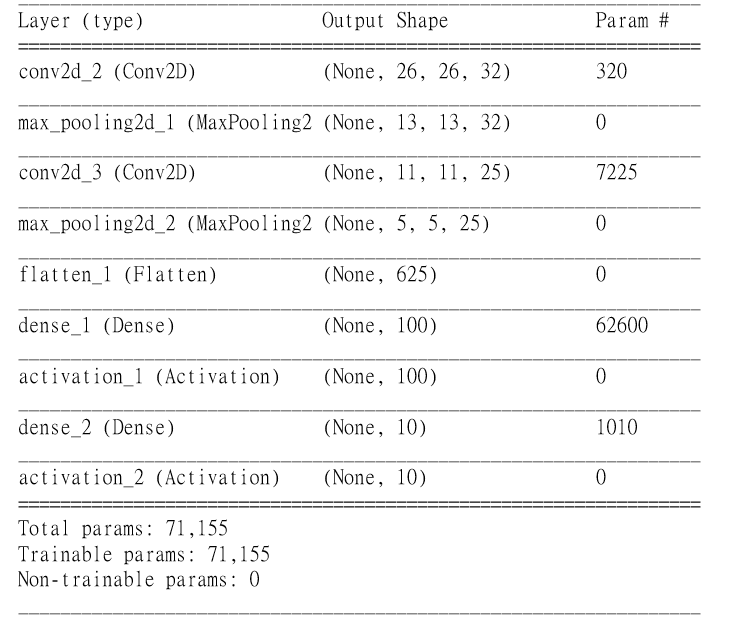



In [3]:
#建立一個序列模型
model_no_pool = models.Sequential()
#建立一個卷積層, 32 個內核, 內核大小 3x3, 
#輸入影像大小 28x28x1
model_no_pool.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
## ==> 28-(3-1) = 26; (28, 28, 1) -> Conv2D(32, (3, 3)) -> (26, 26, 32)
## Param: (28, 28, "1") -> Conv2D("32", ("3", "3")) : (3*3*1 + 1) * 32 = 320

# 移除池化層
'''
#新增一池化層, 採用maxpooling
model_no_pool.add(MaxPooling2D(2,2))
'''

#建立第二個卷積層, 池化層, 
#請注意, 不需要再輸入 input_shape
model_no_pool.add(layers.Conv2D(25, (3, 3)))
## ==>26-(3-1) = 24; (26, 26, 32) -> Conv2D(25, (3, 3)) -> (24, 24, 25)
## Param: (26, 26, "32") -> Conv2D("25", ("3", "3")) : (3*3*32 + 1) * 25 = 7225
# 移除池化層
'''
model_no_pool.add(MaxPooling2D(2,2))
'''

#新增平坦層
model_no_pool.add(Flatten())
## ==> 24*24*25=14400; (24, 24, 25) -> Flatten() -> (14400)

#建立一個全連接層
model_no_pool.add(Dense(units=100))
## ==> (14400) -> Dense(units=100) -> (100)
## Param: (14400) -> Dense(units=100) : (14400 + 1) * 100 = 1440100
model_no_pool.add(Activation('relu'))
## ==> (100) -> Activation('relu') -> (100)

#建立一個輸出層, 並採用softmax
model_no_pool.add(Dense(units=10))
## ==> (100) -> Dense(units=10) -> (10)
## Param: (100) -> Dense(units=10) : (100 + 1) * 10 = 1010
model_no_pool.add(Activation('softmax'))
## ==> (10) -> Activation('softmax') -> (10)

## Param: 320+7225+1440100+1010=1448655
model_no_pool.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 25)        7225      
_________________________________________________________________
flatten_2 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1440100   
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total para

In [4]:
import pydot
from IPython.display import Image  

def model_image(model, to_file):
    # ref: https://keras.io/utils/#print_summary
    keras.utils.plot_model(model, to_file=to_file, show_shapes=True, show_layer_names=True, rankdir='TB')

    return Image(to_file)

model(reference):------------------------------------------------------------


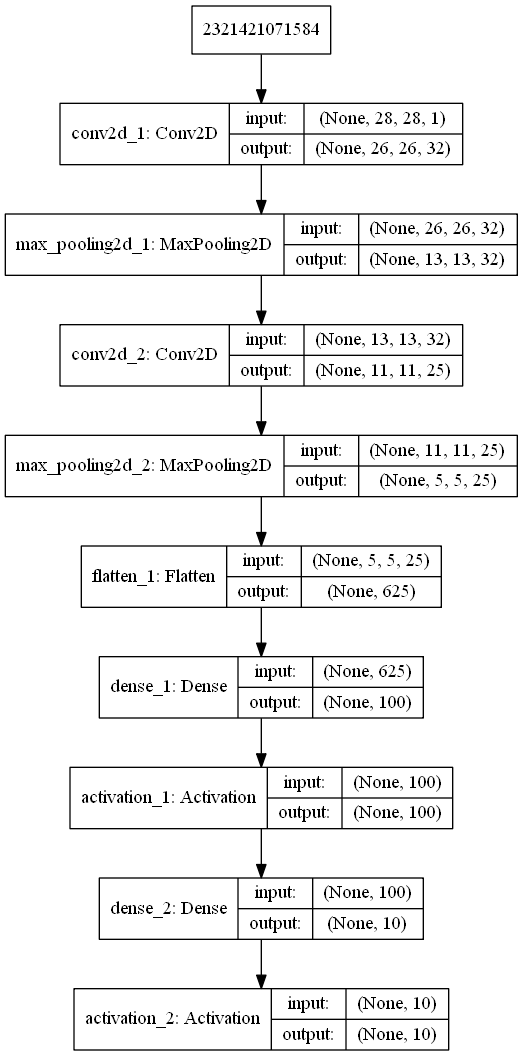

In [5]:
print(f"model(reference):{'-'*60}")
img = model_image(model_ref, 'model_ref.png')
img

model(no pooling):------------------------------------------------------------


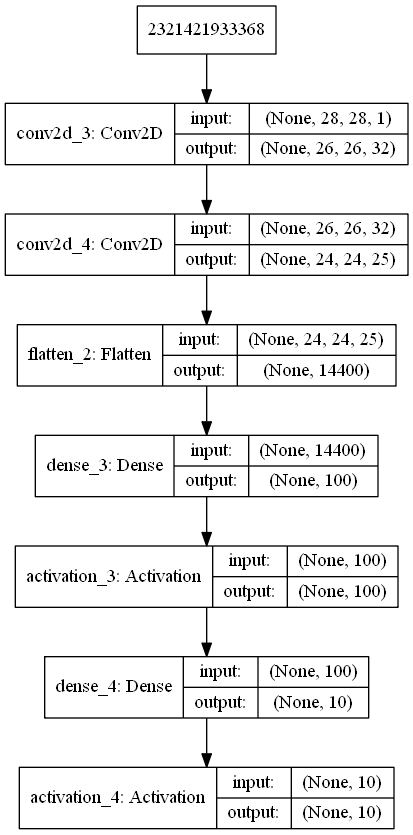

In [6]:
print(f"model(no pooling):{'-'*60}")
img = model_image(model_no_pool, 'model_no_pool.png')
img

--- ---

In [7]:
'''
#建立一個序列模型
model = models.Sequential()
#建立兩個卷積層, 32 個內核, 內核大小 3x3, 
#輸入影像大小 28x28x1

#建立一個全連接層
model.add(Dense(units=100))
model.add(Activation('relu'))

#建立一個輸出層, 並採用softmax
model.add(Dense(units=10))
model.add(Activation('softmax'))
'''

from keras.models import Sequential
from keras.layers import Dense, Activation

model_dense = Sequential([
    Dense(32, input_shape=(784,)),
    Dense(32),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model_dense.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


model(dense):------------------------------------------------------------


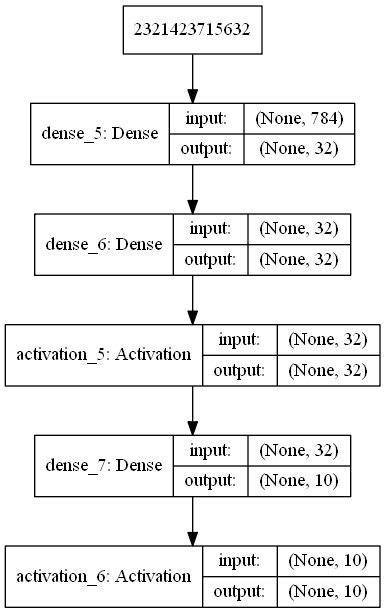

In [8]:
print(f"model(dense):{'-'*60}")
img = model_image(model_dense, 'model_dense.png')
img

In [9]:
model_conv2d = Sequential([
    #Conv2D(32, (3, 3), input_shape=(784,)),
    Conv2D(32, (3, 3), input_shape=(28,28,1)),
    Dense(32),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model_conv2d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dense_8 (Dense)              (None, 26, 26, 32)        1056      
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
dense_9 (Dense)              (None, 26, 26, 10)        330       
_________________________________________________________________
activation_8 (Activation)    (None, 26, 26, 10)        0         
Total params: 1,706
Trainable params: 1,706
Non-trainable params: 0
_________________________________________________________________


model(conv2d):------------------------------------------------------------


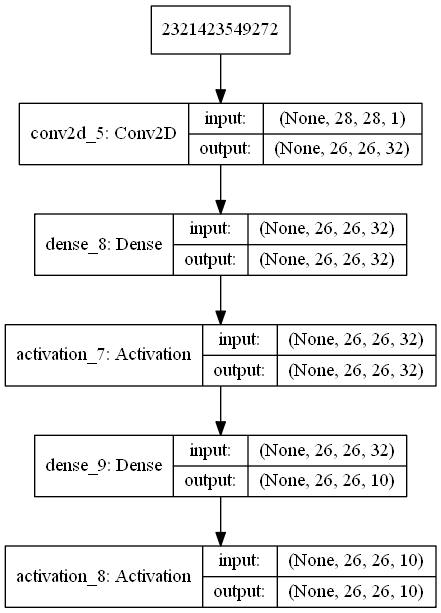

In [10]:
print(f"model(conv2d):{'-'*60}")
img = model_image(model_conv2d, 'model_conv2d.png')
img